In [1]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv("./term-deposit-marketing-2020.csv")


In [4]:
data['y'].value_counts()

y
no     37104
yes     2896
Name: count, dtype: int64

Out of 40K customers contacted in the marketing campaign, 37104 customers (93%) did not subscribe and 2896 customers (7%) subscribed to a term-deposit. There is a class imbalance. 

In [48]:
# List of categorical variables
categorical_features = ['job', 'marital', 'contact', 'month', 'education']

# Loop through each categorical variable and print the count of each category
for feature in categorical_features:
    print(f'Category counts for {feature}:')
    print(data[feature].value_counts())
    print('-' * 40)  # Separator for readability

binary_features=['default','housing','loan']

# Loop through each categorical variable and print the count of each category
for feature in binary_features:
    print(f'Category counts for {feature}:')
    print(data[feature].value_counts())
    print('-' * 40)  # Separator for readability


Category counts for job:
job
blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: count, dtype: int64
----------------------------------------
Category counts for marital:
marital
married     24386
single      10889
divorced     4725
Name: count, dtype: int64
----------------------------------------
Category counts for contact:
contact
cellular     24914
unknown      12765
telephone     2321
Name: count, dtype: int64
----------------------------------------
Category counts for month:
month
may    13532
jul     6380
aug     5215
jun     4734
nov     3598
apr     2718
feb     2296
jan     1176
mar      258
oct       80
dec       13
Name: count, dtype: int64
----------------------------------------
Category counts for education:
education
secondary    20993
tertiary     11206

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

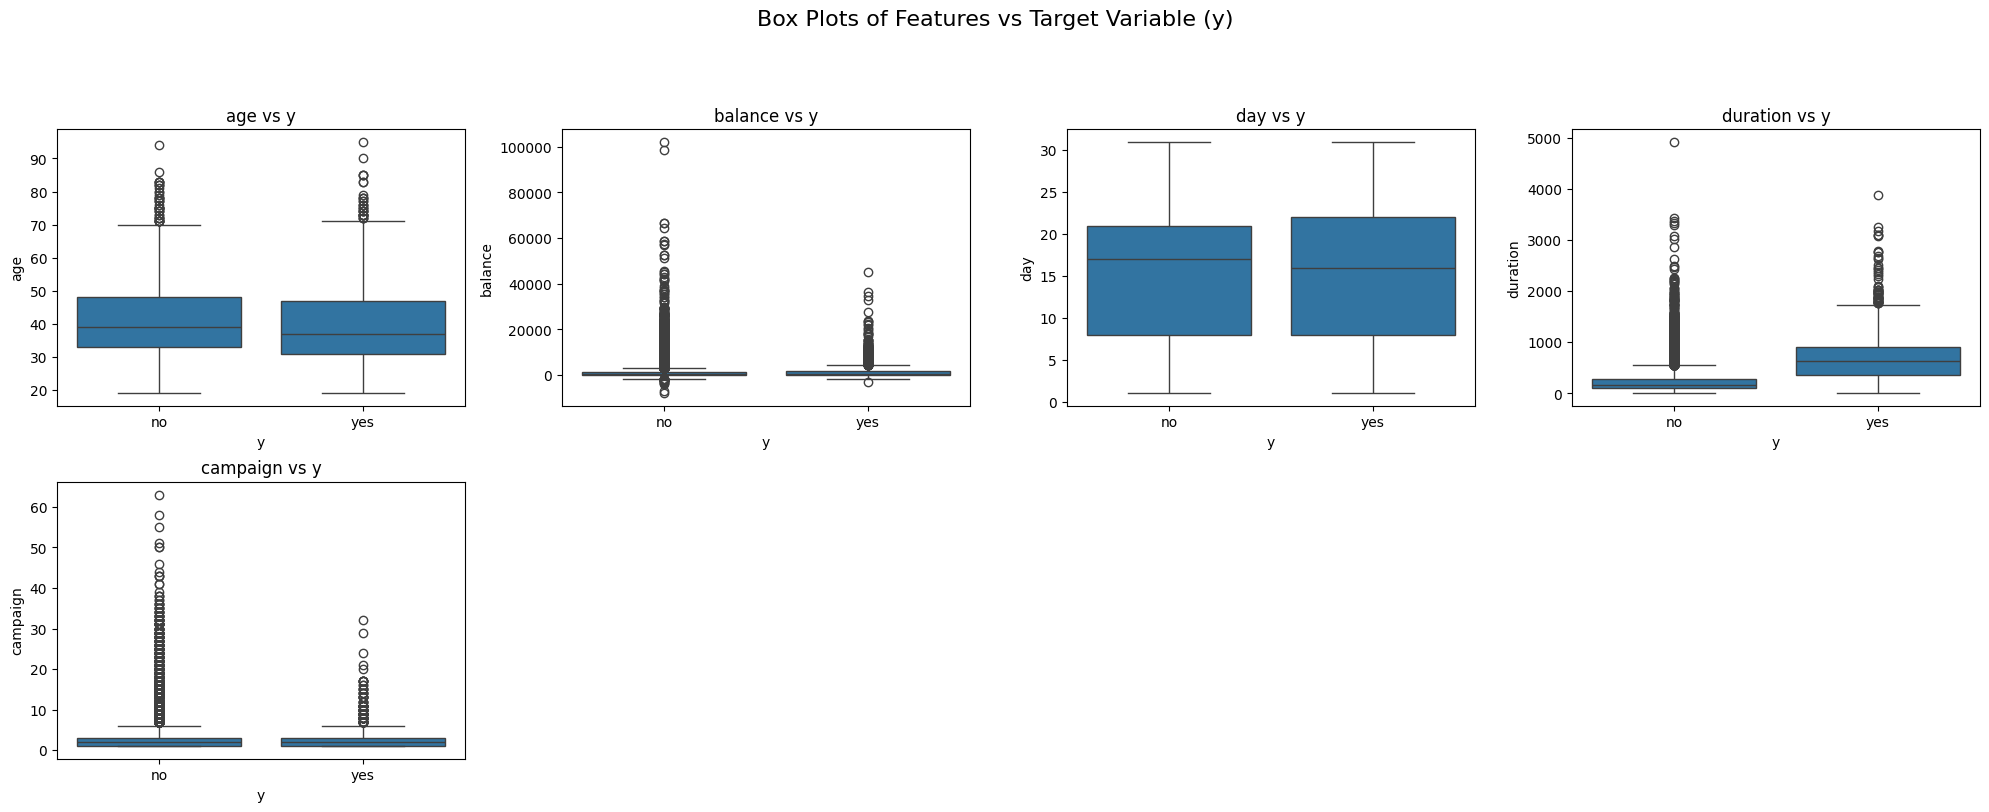

In [15]:
X = data.drop(['y'],axis=1)
y= data['y']
features=X.columns

# List of categorical features to exclude from box plots
categorical_features = ['job', 'marital', 'education', 'contact', 'month']
binary_features=['default','housing','loan']

# Filter out categorical features to get only numeric and binary features
numeric_features = [feature for feature in features if feature not in categorical_features and feature not in binary_features]

# Create a grid of subplots (4 rows x 4 columns)
fig, axes = plt.subplots(4, 4, figsize=(20, 15))
fig.suptitle('Box Plots of Numeric Features vs Target Variable (y)', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each feature and plot
for i, feature in enumerate(numeric_features):
    sns.boxplot(x='y', y=feature, data=data, ax=axes[i])
    axes[i].set_title(f'{feature} vs y')

# Remove any empty subplots (there will be 3 empty plots)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust top for the suptitle
plt.show()


The data has lots of outliers. Let's remove the outliers then look for patterns.

In [66]:
# Function to remove outliers using IQR
def remove_outliers(df, features):
    df_no_outliers = df.copy()
    for feature in features:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df_no_outliers[feature].quantile(0.25)
        Q3 = df_no_outliers[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out the outliers
        df_no_outliers = df_no_outliers[(df_no_outliers[feature] >= lower_bound) & (df_no_outliers[feature] <= upper_bound)]
        
    return df_no_outliers

# Remove outliers from continuous features
data_cleaned = remove_outliers(data, numeric_features)

# Display the cleaned data
print(data_cleaned.describe())


                age       balance           day      duration      campaign
count  30467.000000  30467.000000  30467.000000  30467.000000  30467.000000
mean      40.242196    571.955493     15.640759    201.956248      2.180753
std        9.469559    780.794935      8.279490    136.049736      1.338638
min       19.000000  -1818.000000      1.000000      0.000000      1.000000
25%       33.000000     30.000000      8.000000    100.000000      1.000000
50%       39.000000    311.000000     16.000000    167.000000      2.000000
75%       47.000000    878.000000     21.000000    272.000000      3.000000
max       70.000000   3207.000000     31.000000    626.000000      6.000000


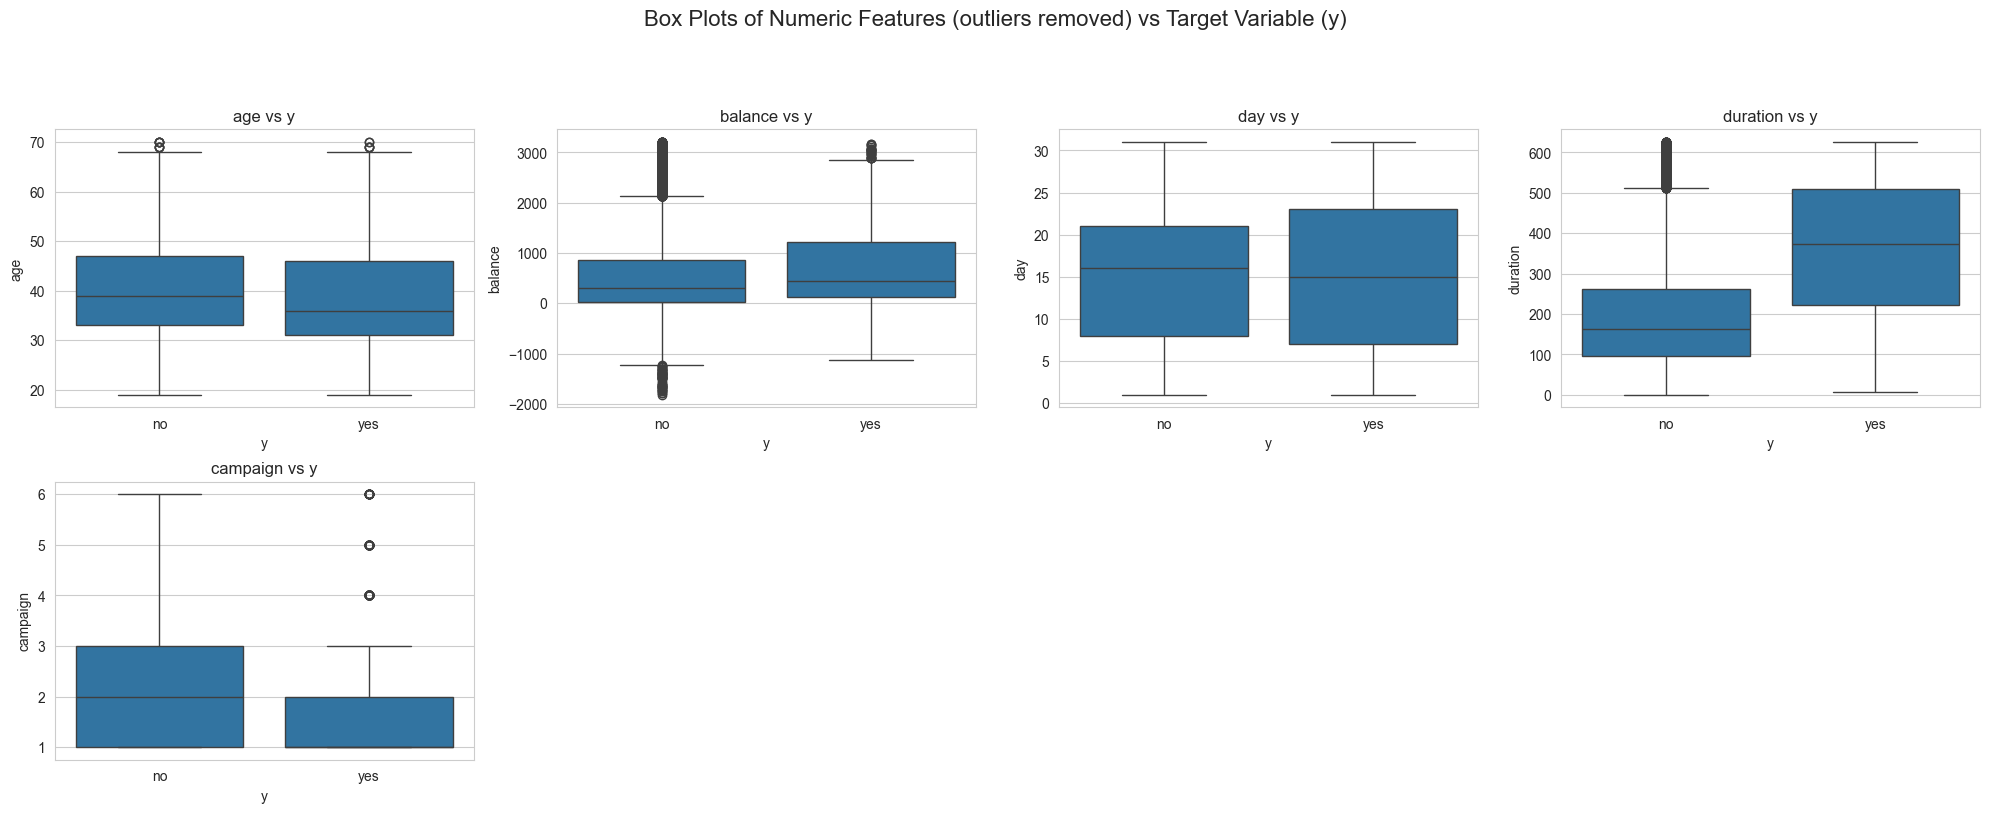

In [67]:
# Create a grid of subplots (4 rows x 4 columns)
fig, axes = plt.subplots(4, 4, figsize=(20, 15))
fig.suptitle('Box Plots of Numeric Features (outliers removed) vs Target Variable (y)', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each feature and plot
for i, feature in enumerate(numeric_features):
    sns.boxplot(x='y', y=feature, data=data_cleaned, ax=axes[i])
    axes[i].set_title(f'{feature} vs y')

# Remove any empty subplots (there will be 3 empty plots)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust top for the suptitle
plt.show()

Rough Pattern: Younger people, with more money in their bank accounts, contacted during the first half of the month, who speak for longer, tend to subscribe.

<br>
All the numeric features age, balance, day, duration, campaign seem to have predictive power...they have an effect on the outcome.

In [68]:
data_cleaned['y'].value_counts()

y
no     29327
yes     1140
Name: count, dtype: int64

Out of the original 40,000 records, roughly 10K are outliers. With the outliers removed 96% are not subscribers and 4% are subscribers. 

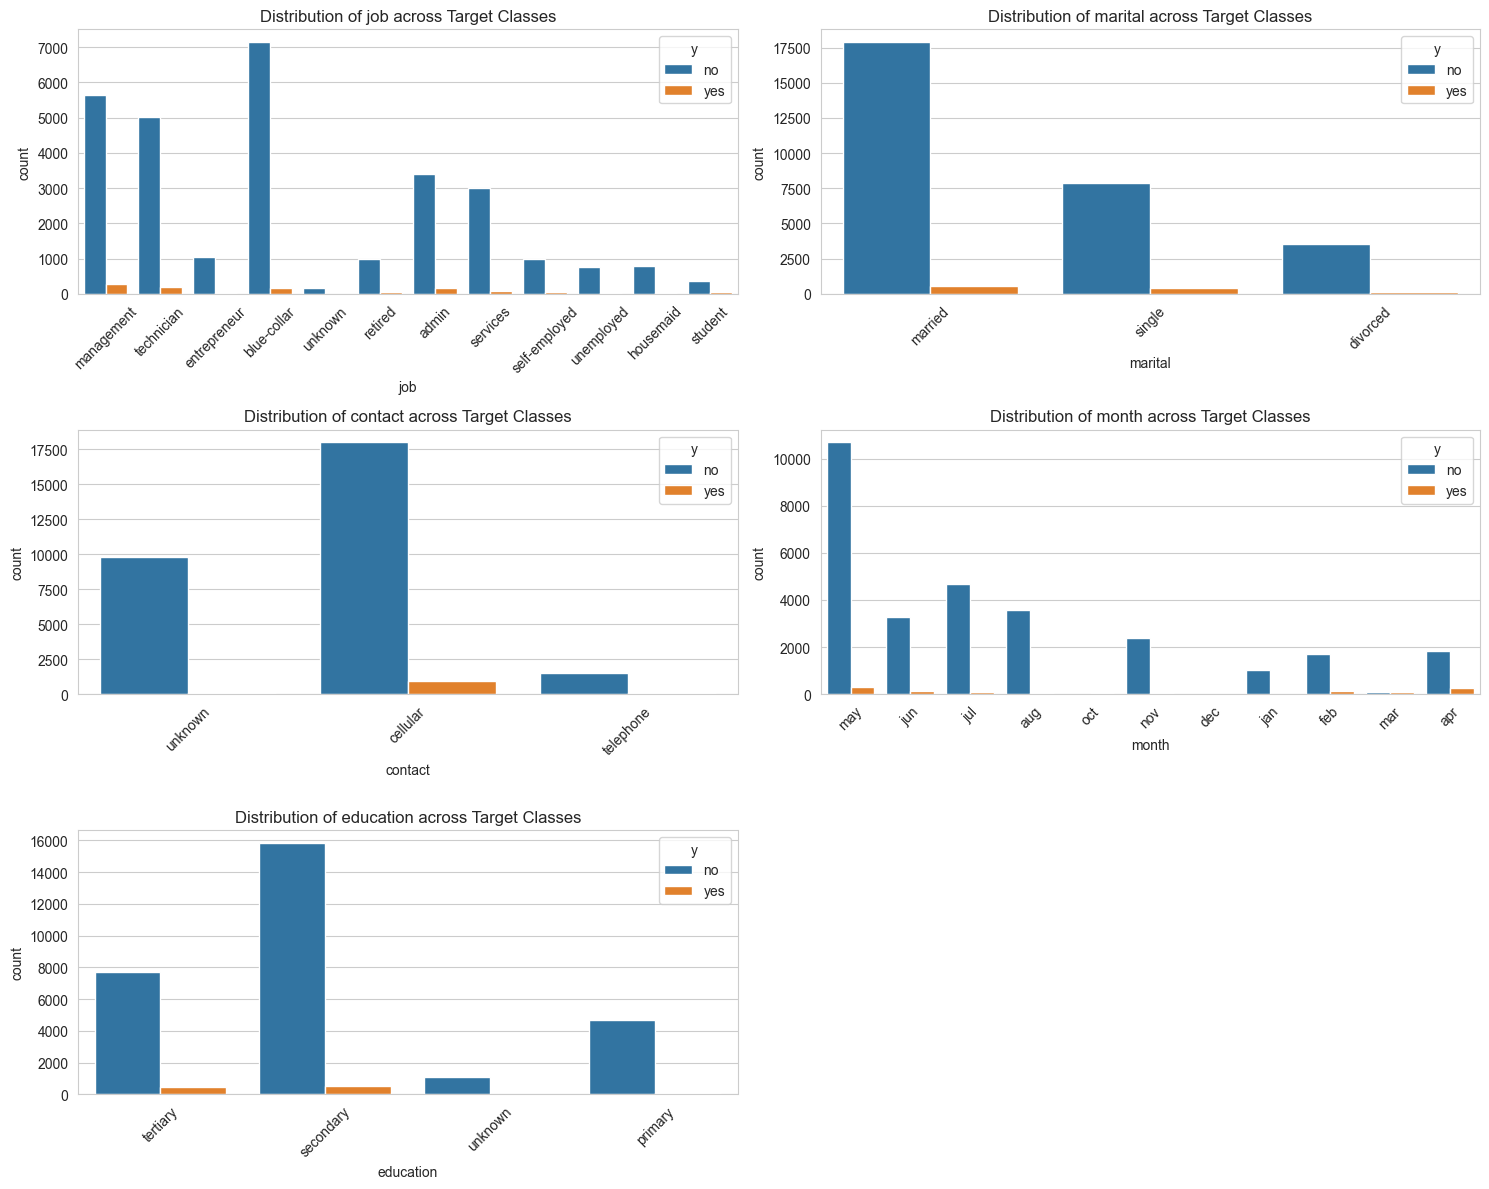

In [70]:
# Set up the plot
plt.figure(figsize=(15, 12))  # Adjust the figure size as necessary

# Loop through each categorical feature and create a bar chart
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)  # 3 rows, 2 columns layout
    sns.countplot(x=feature, hue='y', data=data_cleaned)  # hue='y' adds the target class to the plot
    plt.title(f'Distribution of {feature} across Target Classes')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Pattern: Job = Management, technician, blue collar, admin, services. Married or single people not divorced. Contacted by cellular in the months of feb through july whose education is secondary or tertiary.  



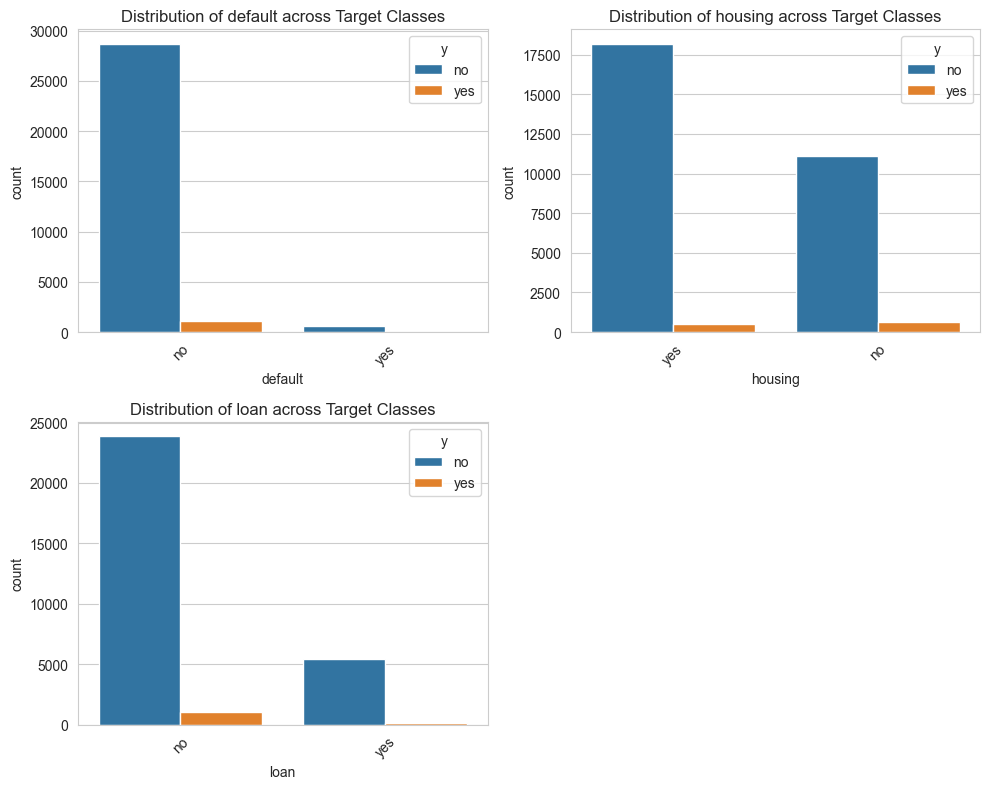

In [72]:
# Set up the plot
plt.figure(figsize=(10, 8))  # Adjust the figure size as necessary

# Loop through each binary feature and create a bar chart
for i, feature in enumerate(binary_features, 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns layout (adjust if needed)
    sns.countplot(x=feature, hue='y', data=data_cleaned)  # hue='y' adds the target class to the plot
    plt.title(f'Distribution of {feature} across Target Classes')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Pattern: Those who have not defaulted and don't have a loan. 

Now let's try to filter the data based on these eye-balling observations. 

In [84]:
# Define filter conditions for each feature
job_filter = ~data_cleaned['job'].isin(['housemaid', 'unemployed', 'entrepreneur', 'unknown'])  # Exclude these categories
marital_filter = data_cleaned['marital'].isin(['married', 'single'])  # Exclude 'divorced'
contact_filter = data_cleaned['contact'] == 'cellular'
month_filter = data_cleaned['month'].isin(['feb', 'mar', 'apr', 'may', 'jun', 'jul'])  # Feb to July
education_filter = data_cleaned['education'].isin(['secondary', 'tertiary'])
default_filter = data_cleaned['default'] == 'no'
loan_filter = data_cleaned['loan'] == 'no'

# Apply all filters together
filtered_data = data_cleaned[job_filter & contact_filter & month_filter & education_filter & default_filter]

# Count the number of records that match the filter
count = filtered_data.shape[0]

# Display the count
print(f'Total records that match the filter: {count}')

Total records that match the filter: 9217


Let's see how many subscribers are lost.

In [76]:
subscribed = data_cleaned[data_cleaned['y']=='yes']
subscribed.shape

(1140, 14)

In [85]:
# Apply all filters together
subscribed_filtered_data = subscribed[job_filter & contact_filter & month_filter & education_filter & default_filter]

# Count the number of records that match the filter
count_filtered_subscribers = subscribed_filtered_data.shape[0]

# Display the count
print(f'Total subscribers that match the filter: {count_filtered_subscribers}')

Total subscribers that match the filter: 700


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18332\1544928984.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subscribed_filtered_data = subscribed[job_filter & contact_filter & month_filter & education_filter & default_filter]


In [105]:
# Prepare a list to hold the counts for all sub-categories
all_counts = []

# Loop through each categorical feature
for feature in categorical_features:
    # Get the unique sub-categories in the feature
    sub_categories = data_cleaned[feature].unique()
    
    # Loop through each sub-category in the feature
    for sub_category in sub_categories:
        # Create a subset of the data for the sub-category
        subset_data = data_cleaned[data_cleaned[feature] == sub_category]
        
        # Count occurrences of target variable
        count_data = subset_data['y'].value_counts()
        
        # Append counts to the list
        all_counts.append({
            'feature': feature,
            'sub_category': sub_category,
            'yes': count_data.get('yes', 0),
            'no': count_data.get('no', 0)
        })

# Create a DataFrame from the counts
counts_df = pd.DataFrame(all_counts)

# Group by feature and sub_category and sum the counts
grouped_counts_df = counts_df.groupby(['feature', 'sub_category'], as_index=False).sum()

# Calculate proportion of 'yes' to 'no'
grouped_counts_df['proportion'] = grouped_counts_df['yes'] / (grouped_counts_df['yes'] + grouped_counts_df['no'])

# Sort the DataFrame by count of 'yes' in ascending order
sorted_by_yes_df = grouped_counts_df.sort_values(by='yes', ascending=True)

# Print the sorted DataFrame ordered by yes count
print("Sorted by Yes Count:")
print(sorted_by_yes_df[['feature', 'sub_category', 'yes', 'no', 'proportion']])

# Sort the DataFrame by proportion in ascending order
sorted_by_proportion_df = grouped_counts_df.sort_values(by='proportion', ascending=True)

# Print the sorted DataFrame ordered by proportion
print("\nSorted by Proportion:")
print(sorted_by_proportion_df[['feature', 'sub_category', 'yes', 'no', 'proportion']])

Sorted by Yes Count:
      feature   sub_category  yes     no  proportion
24      month            dec    1     11    0.083333
26      month            jan    5   1041    0.004780
18        job        unknown    7    154    0.043478
10        job      housemaid   20    794    0.024570
9         job   entrepreneur   28   1040    0.026217
32      month            oct   29     22    0.568627
6   education        unknown   32   1087    0.028597
17        job     unemployed   38    776    0.046683
13        job  self-employed   40    992    0.038760
15        job        student   49    364    0.118644
12        job        retired   49    987    0.047297
31      month            nov   62   2373    0.025462
1     contact      telephone   68   1533    0.042473
23      month            aug   71   3573    0.019484
14        job       services   83   3007    0.026861
27      month            jul   87   4696    0.018189
29      month            mar   88     98    0.473118
3   education        prim

In [100]:
# Define the conditions for removal based on the identified candidates
conditions_to_remove = (
    (data_cleaned['month'] == 'jan') |
    (data_cleaned['job'] == 'unknown') |
    (data_cleaned['job'] == 'housemaid') |
    (data_cleaned['job'] == 'entrepreneur') |
    (data_cleaned['job'] == 'unemployed') |
    (data_cleaned['job'] == 'student')
)

# Filter the dataset to keep only the rows that do not meet the removal conditions
data_filtered = data_cleaned[~conditions_to_remove]

# Display the shape of the original and filtered datasets
print("Original dataset shape:", data_cleaned.shape)
print("Filtered dataset shape:", data_filtered.shape)
# Apply all filters together
subscribed_filtered_data = subscribed[~conditions_to_remove]

# Display the shape of the original and filtered datasets
print("Original subscribers shape:", subscribed.shape)
print("Filtered dataset shape:", subscribed_filtered_data.shape)


Original dataset shape: (30467, 14)
Filtered dataset shape: (26311, 14)
Original subscribers shape: (1140, 14)
Filtered dataset shape: (994, 14)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18332\92691485.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subscribed_filtered_data = subscribed[~conditions_to_remove]


In [101]:
# Prepare a list to hold the counts for all sub-categories
binary_counts = []

# Loop through each binary feature
for feature in binary_features:
    # Get the unique sub-categories in the feature
    sub_categories = data_cleaned[feature].unique()
    
    # Loop through each sub-category in the feature
    for sub_category in sub_categories:
        # Create a subset of the data for the sub-category
        subset_data = data_cleaned[data_cleaned[feature] == sub_category]
        
        # Count occurrences of target variable
        count_data = subset_data['y'].value_counts()
        
        # Append counts to the list
        binary_counts.append({
            'feature': feature,
            'sub_category': sub_category,
            'yes': count_data.get('yes', 0),
            'no': count_data.get('no', 0)
        })

# Create a DataFrame from the counts
binary_counts_df = pd.DataFrame(binary_counts)

# Calculate proportion of 'yes' to 'no'
binary_counts_df['proportion'] = binary_counts_df['yes'] / (binary_counts_df['yes'] + binary_counts_df['no'])

# Sort the DataFrame by the count of 'yes' in ascending order
sorted_binary_counts_df = binary_counts_df.sort_values(by='yes', ascending=True)

# Print the sorted DataFrame with relevant columns
print(sorted_binary_counts_df[['feature', 'sub_category', 'yes', 'no', 'proportion']])

   feature sub_category   yes     no  proportion
1  default          yes    22    646    0.032934
5     loan          yes   122   5465    0.021836
2  housing          yes   493  18191    0.026386
3  housing           no   647  11136    0.054910
4     loan           no  1018  23862    0.040916
0  default           no  1118  28681    0.037518


<h1> Findings </h1>

1) By not calling in the month of January and by not calling those who work in jobs in unknown, housemaid, entrepreneur, unemployed, student we can reduce 4156 out of 30467 calls (13.6%) while losing 146 out of 1140 (12.8%) subscribers. 

2) By removing contact=unknown you can reduce 9789 calls (32%) while losing only 117 (10%) subscribers. 

3) By removing month=jan you can reduce the calls by 1041 (3.4%) while losing 5 subscribers (0.4%). 

4) By removing loan=yes can reduce 5465 calls (18%) while losing 122 subscribers (10.7%). 

5) By removing both 2 and 3 can reduce 10830 calls (35.5%) while losing 122 subscribers (10.7%)